In [86]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
import os
import random

In [118]:
df = pd.read_csv("../diaries_transactions_all.csv");
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483949 entries, 0 to 483948
Data columns (total 58 columns):
hh_ids                        483949 non-null object
unique_hhs                    298 non-null float64
first_trx_date_hh             483949 non-null object
last_trx_date_hh              483949 non-null object
tot_hh_daysofobs              483949 non-null int64
tot_hh_monthsofobs            483949 non-null int64
interview_designation         483681 non-null object
int_date                      483949 non-null object
int_month                     483949 non-null int64
int_year                      483949 non-null int64
int_yr_mo                     483949 non-null object
first_int_date                483949 non-null object
account_ids                   483949 non-null object
unique_accnts                 9546 non-null float64
m_ids_owner                   483949 non-null object
unique_hm_owner               670 non-null float64
account_bsheet_desig          77070 non-null objec

In [119]:
frmlln = df[ df['trx_type_code'] == 2760]


In [120]:
frmlln.shape



(442, 58)

In [121]:
len(frmlln['account_ids'].unique())

48

In [122]:
frmlln.describe()

,unique_hhs,tot_hh_daysofobs,tot_hh_monthsofobs,int_month,int_year,unique_accnts,unique_hm_owner,tot_acc_daysofobs,tot_acc_monthsofobs,trx_id,...,trx_fee,trx_mode_code,trx_place_incommunity,trx_distance_km,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr
count,3.0,442.000000,442.000000,442.000000,442.000000,48.0,2.0,442.000000,442.000000,4.420000e+02,...,442.000000,442.000000,332.000000,332.000000,442.000000,442.000000,442.0,14.000000,14.000000,442.000000
mean,1.0,400.805430,13.348416,7.565611,2012.843891,1.0,1.0,306.190045,9.979638,6.723022e+16,...,0.011312,7.226244,0.695783,5.657515,16242.230769,191.085072,0.0,67.163866,5708.928571,7.725542
std,0.0,25.613792,0.931125,2.939526,0.363370,0.0,0.0,92.562782,3.179019,2.488620e+16,...,0.105875,7.475641,0.460769,27.004757,42104.916035,495.351961,0.0,35.896000,3051.160043,4.100399
min,1.0,360.000000,12.000000,1.000000,2012.000000,1.0,1.0,0.000000,0.000000,3.413824e+16,...,0.000000,1.000000,0.000000,0.000000,-1000.000000,-11.764710,0.0,0.000000,0.000000,0.000000
25%,1.0,386.000000,13.000000,5.000000,2013.000000,1.0,1.0,258.500000,8.000000,5.913498e+16,...,0.000000,1.000000,0.000000,0.000000,500.000000,5.882353,0.0,46.764705,3975.000000,4.491379
50%,1.0,397.000000,13.000000,9.000000,2013.000000,1.0,1.0,344.000000,11.000000,5.913817e+16,...,0.000000,1.000000,1.000000,0.000000,3000.000000,35.294120,0.0,74.117650,6300.000000,7.827586
75%,1.0,413.000000,14.000000,10.000000,2013.000000,1.0,1.0,368.000000,12.000000,1.051365e+17,...,0.000000,16.000000,1.000000,5.279816,10983.000000,129.211800,0.0,85.882350,7300.000000,11.431038
max,1.0,478.000000,16.000000,12.000000,2013.000000,1.0,1.0,419.000000,14.000000,1.121383e+17,...,1.000000,19.000000,1.000000,245.429700,341850.000000,4021.765000,0.0,113.235300,9625.000000,14.793100


In [123]:
frmlln.head()

,hh_ids,unique_hhs,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,...,trx_distance_km,trx_outlet,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_units,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr
27,KVIHK40,NaN,10sep2012,03oct2013,388,13,06=Cleaning interview,04oct2013,10,2013,...,NaN,NaN,NaN,101300.0,1191.76500,0,NaN,NaN,NaN,13.379310
162,KELDK37,NaN,24sep2012,30nov2013,432,14,04=Diaries Interview,08apr2013,4,2013,...,NaN,NaN,NaN,18000.0,211.76470,0,NaN,NaN,NaN,6.034483
205,KELDK20,NaN,30aug2012,02nov2013,429,14,06=Cleaning interview,11oct2013,10,2013,...,NaN,NaN,NaN,2580.0,30.35294,0,NaN,NaN,NaN,7.689655
936,KELDK38,NaN,01sep2012,22oct2013,416,14,04=Diaries Interview,06jun2013,6,2013,...,NaN,NaN,NaN,298000.0,3505.88200,0,NaN,NaN,NaN,8.344828
1078,KELDK15,NaN,17sep2012,23oct2013,401,13,04=Diaries Interview,26sep2013,9,2013,...,NaN,NaN,NaN,21250.0,250.00000,0,NaN,NaN,NaN,12.896550


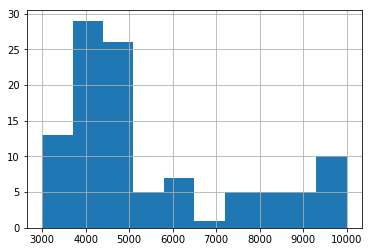

In [124]:
frmlln[((frmlln ["trx_value_kes"] >= 3000) & (frmlln ["trx_value_kes"] <=10000))]["trx_value_kes"].hist()

148,041 KES

In [125]:
frmlln.describe()

,unique_hhs,tot_hh_daysofobs,tot_hh_monthsofobs,int_month,int_year,unique_accnts,unique_hm_owner,tot_acc_daysofobs,tot_acc_monthsofobs,trx_id,...,trx_fee,trx_mode_code,trx_place_incommunity,trx_distance_km,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr
count,3.0,442.000000,442.000000,442.000000,442.000000,48.0,2.0,442.000000,442.000000,4.420000e+02,...,442.000000,442.000000,332.000000,332.000000,442.000000,442.000000,442.0,14.000000,14.000000,442.000000
mean,1.0,400.805430,13.348416,7.565611,2012.843891,1.0,1.0,306.190045,9.979638,6.723022e+16,...,0.011312,7.226244,0.695783,5.657515,16242.230769,191.085072,0.0,67.163866,5708.928571,7.725542
std,0.0,25.613792,0.931125,2.939526,0.363370,0.0,0.0,92.562782,3.179019,2.488620e+16,...,0.105875,7.475641,0.460769,27.004757,42104.916035,495.351961,0.0,35.896000,3051.160043,4.100399
min,1.0,360.000000,12.000000,1.000000,2012.000000,1.0,1.0,0.000000,0.000000,3.413824e+16,...,0.000000,1.000000,0.000000,0.000000,-1000.000000,-11.764710,0.0,0.000000,0.000000,0.000000
25%,1.0,386.000000,13.000000,5.000000,2013.000000,1.0,1.0,258.500000,8.000000,5.913498e+16,...,0.000000,1.000000,0.000000,0.000000,500.000000,5.882353,0.0,46.764705,3975.000000,4.491379
50%,1.0,397.000000,13.000000,9.000000,2013.000000,1.0,1.0,344.000000,11.000000,5.913817e+16,...,0.000000,1.000000,1.000000,0.000000,3000.000000,35.294120,0.0,74.117650,6300.000000,7.827586
75%,1.0,413.000000,14.000000,10.000000,2013.000000,1.0,1.0,368.000000,12.000000,1.051365e+17,...,0.000000,16.000000,1.000000,5.279816,10983.000000,129.211800,0.0,85.882350,7300.000000,11.431038
max,1.0,478.000000,16.000000,12.000000,2013.000000,1.0,1.0,419.000000,14.000000,1.121383e+17,...,1.000000,19.000000,1.000000,245.429700,341850.000000,4021.765000,0.0,113.235300,9625.000000,14.793100


In [126]:
frmlln["trx_prx_purpose"].unique()

array(['6. Closing Balance--End of last DQ',
       '1. Starting balance (today)', '5. Interest accruing',
       '3. Payments', 'INCREASE--Unexplained balance adjustment',
       '4. Any known fees', 'DECREASE--Unexplained balance adjustment',
       '7. Refund from lender', '2. New borrowing'], dtype=object)

In [127]:
len(frmlln[frmlln["trx_prx_purpose"]=="5. Interest accruing"]["account_ids"].unique())

11

In [128]:
frmlln['account_ids'].nunique()

48

In [129]:
print(frmlln['account_ids'].nunique())

48


In [130]:
acc = random.choice(frmlln["account_ids"].unique())
print(acc)

59134691680100000


In [134]:
history = frmlln[frmlln["account_ids"]==acc]
history.sort_values("trx_stdtime_days_acc", inplace=True)